# Исследование рынка заведений общественного питания Москвы

- Автор: Alena Tsimafeyeva
- Дата: 24.06.2025

### Цели и задачи проекта

Провести исследовательский анализ рынка общественного питания Москвы, чтобы помочь инвесторам из фонда Shut Up and Take My Money определить:
- тип заведения (кафе, ресторан, бар и др.)
- оптимальное местоположение
- ценовую политику
- другие параметры для успешного запуска бизнеса.

### Описание данных

Файл `/datasets/rest_info.csv` содержит информацию о заведениях общественного питания:
- `name` — название заведения;
- `address` — адрес заведения;
- `district` — административный район, в котором находится заведение, например Центральный административный округ;
- `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- `hours` — информация о днях и часах работы;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
    - 0 — заведение не является сетевым;
    - 1 — заведение является сетевым.
- `seats` — количество посадочных мест.

Файл `/datasets/rest_price.csv` содержит информацию о среднем чеке в заведениях общественного питания:
- `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
    - «Средний счёт: 1000–1500 ₽»;
    - «Цена чашки капучино: 130–220 ₽»;
    - «Цена бокала пива: 400–600 ₽».
и так далее;
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки «Средний счёт»:
    - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    - Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки «Цена одной чашки капучино»:
    - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    - Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.

### Содержимое проекта

1. [Загрузка данных и знакомство с ними](#section1)
2. [Промежуточный вывод](#section2)  
3. [Подготовка единого датафрейма](#section3)  
4. [Предобработка данных](#section4)  
5. [Промежуточный вывод](#section5)
6. [Исследовательский анализ данных](#section6)  
    - [Исследование количества объектов общественного питания по категориям](#section7)
    - [Исследование распределения количества заведений по административным районам Москвы](#section8)
    - [Исследование соотношения сетевых и несетевых заведений](#section9)
    - [Исследование количества посадочных мест в заведениях](#section10)
    - [Исследование рейтинга заведений](#section11)
    - [Исследование корреляций рейтинга заведений](#section12)
    - [Топ-15 популярных сетей в Москве](#section13)
    - [Изучение вариаций среднего чека заведения в зависимости от района Москвы](#section14)
    - [Промежуточный вывод](#section15)
7.  [Итоговый вывод и рекомендации](#section16)

---

<a id="section1"></a>
## 1. Загрузка данных и знакомство с ними

- Загрузите данные о заведениях общественного питания Москвы. Путь к файлам: `/datasets/rest_info.csv` и `/datasets/rest_price.csv`.

In [1]:
!pip install phik

     |████████████████████████████████| 677 kB 1.4 MB/s eta 0:00:01


In [2]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix 

In [3]:
# Выгружаем данные из датасета rest_info.csv в датафрейм rest_info
rest_info = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')

In [4]:
# Инфо о датафрейме rest_info
rest_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


In [5]:
# Первые 10 строк датафрейма rest_info
rest_info.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [6]:
# Применяем метод isna() к датафрейму rest_info
rest_info.isna().sum()

id             0
name           0
category       0
address        0
district       0
hours        536
rating         0
chain          0
seats       3611
dtype: int64

In [7]:
# Подсчитываем долю строк с пропусками в датафрейме rest_info
rest_info.isna().sum() / rest_info.shape[0]

id          0.000000
name        0.000000
category    0.000000
address     0.000000
district    0.000000
hours       0.063764
rating      0.000000
chain       0.000000
seats       0.429574
dtype: float64

---

In [8]:
# Выгружаем данные из датасета rest_price.csv в датафрейм rest_price
rest_price = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

In [9]:
# Инфо о датафрейме rest_price
rest_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


In [10]:
# Первые 10 строк датафрейма rest_price
rest_price.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [11]:
# Применяем метод isna() к датафрейму rest_price
rest_price.isna().sum()

id                      0
price                 743
avg_bill              242
middle_avg_bill       909
middle_coffee_cup    3523
dtype: int64

In [12]:
# Подсчитываем долю строк с пропусками
rest_price.isna().sum() / rest_price.shape[0]

id                   0.000000
price                0.183095
avg_bill             0.059635
middle_avg_bill      0.224002
middle_coffee_cup    0.868162
dtype: float64

---
<a id="section2"></a>
### Промежуточный вывод

Сделайте промежуточный вывод о полученных данных: данные какого объёма вам предоставили, соответствуют ли данные описанию, встречаются ли в них пропуски, используются ли верные типы данных. Отметьте другие особенности данных, которые вы обнаружите на этой стадии и на которые стоит обратить внимание при предобработке.

Промежуточный вывод о данных из `rest_info.csv`:
1. Всего 8406 записей (заведений) и 9 столбцов.
2. Пропуски:
    - `hours`: 536 пропусков (из 8406) - это важно, так как информация о графике работы может быть полезна для анализа.
    - `seats`: 3611 пропусков (почти 43% данных) - это критично, если анализ связан с вместимостью заведений.
3. В целом, типы соответствуют ожидаемым:
    - Числовые: `rating` (`float`), `chain` (`int`), `seats` (`float`).
    - Строковые (`object`): остальные столбцы.

Промежуточный вывод о данных из `rest_price.csv`:
1. Всего 4058 записей (меньше, чем в rest_info.csv, где было 8406 записей — значит, не у всех заведений есть информация о ценах) и 5 столбцов.
2. Пропуски:
    - `price`: 743 пропуска (~18% данных) - критично для удаления.
    - `avg_bill`: 242 пропуска (~6% данных) - если строка отсутствует, то `middle_avg_bill` и `middle_coffee_cup` тоже будут `NaN`.
    - `middle_avg_bill`: 909 пропусков (~22% данных) - критично для удаления.
    - `middle_coffee_cup`: 3523 пропуска (~87% данных) - ожидаемо, так как это поле заполнено только для кофейных заведений или мест с указанной ценой капучино.
3. В целом, типы соответствуют ожидаемым:
    - `middle_avg_bill` (`float`) – корректно, так как содержит медиану диапазона.
    - `middle_coffee_cup` (`float`) – аналогично.
    - Строковые (`object`) – `price`, `avg_bill` – соответствуют описанию.

Первичное знакомство показывает, что данные соответствуют описанию и выглядят корректными. Однако в обоих датасетах есть пропуски. Для их дальнейшей обработки следует объединить датасеты в один. 

<a id="section3"></a>
### Подготовка единого датафрейма

- Объедините данные двух датасетов в один, с которым вы и продолжите работу.

In [13]:
# Объединение
df = pd.merge(
    rest_info,          # Левый датафрейм
    rest_price,         # Правый датафрейм
    on='id',            # Ключ объединения
    how='outer'          # Тип объединения 
)

# Проверка результата
print(f'Размер df: {df.shape}')
df.head()


Размер df: (8406, 13)


,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


<a id="section4"></a>
## 2. Предобработка данных

Подготовьте данные к исследовательскому анализу:

- Изучите корректность типов данных и при необходимости проведите их преобразование.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


Типы данных выглядят корректными. Но данные столбца `chain` приведем к меньшей разрядности (`int8`) для сокращения использования памяти.

In [15]:
df['chain'] = df['chain'].astype('int8')

- Изучите пропущенные значения в данных: посчитайте их количество в каждом столбце датафрейме, изучите данные с пропущенными значениями и предположите гипотезы их появления. Проведите обработку пропущенных значений: вы можете заменить пропуски на определённое значение, удалить строки с пропусками или оставить их как есть.

In [16]:
df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [17]:
# Подсчитываем долю строк с пропусками
df.isna().sum() / df.shape[0]

id                   0.000000
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
hours                0.063764
rating               0.000000
chain                0.000000
seats                0.429574
price                0.605639
avg_bill             0.546039
middle_avg_bill      0.625387
middle_coffee_cup    0.936355
dtype: float64

- Проверьте данные на явные и неявные дубликаты, например поля с названием и адресом заведения. Для оптимизации проверки нормализуйте данные в текстовых столбцах, например с названием заведения.

In [18]:
# Проверяем полные дубликаты в датафрейме bank_df
df.duplicated().sum()

0

In [19]:
df['name'] = df['name'].str.lower()
df['address'] = df['address'].str.lower()
df['district'] = df['district'].str.lower()

In [20]:
# Проверяем, появились ли дубликаты по 'name', 'address' и 'district'
duplicates = df[df.duplicated(subset=['name', 'address', 'district'], keep=False)]
duplicates.sort_values(by=['name', 'address'])

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
1430,62608690e9cc464fbcd980cfd552e334,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",северный административный округ,"ежедневно, 09:00–21:00",4.2,0,188.0,NaN,NaN,NaN,NaN
1511,a69f018d5c064873a3b491b0121bc1b4,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",4.2,1,188.0,NaN,NaN,NaN,NaN
189,072032ce16dc47bfbc63b672c75bd371,кафе,кафе,"москва, парк ангарские пруды",северный административный округ,"ежедневно, 09:00–23:00",3.2,0,NaN,NaN,NaN,NaN,NaN
215,897ddbc6746c4388b19dc8a9fcdbb488,кафе,кафе,"москва, парк ангарские пруды",северный административный округ,"ежедневно, 10:00–22:00",3.2,0,NaN,NaN,NaN,NaN,NaN
2211,c6ef39ae8a8c483d8f9a6531bc386a2c,раковарня клешни и хвосты,ресторан,"москва, проспект мира, 118",северо-восточный административный округ,"ежедневно, 12:00–00:00",4.4,0,150.0,NaN,NaN,NaN,NaN
2420,aba1de7ad7d64ac0a3f8684bda29d905,раковарня клешни и хвосты,"бар,паб","москва, проспект мира, 118",северо-восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",4.4,1,150.0,NaN,NaN,NaN,NaN
3091,3c2a73ea79a04be48858fab3685f2f37,хлеб да выпечка,булочная,"москва, ярцевская улица, 19",западный административный округ,"ежедневно, 09:00–22:00",4.1,1,276.0,NaN,NaN,NaN,NaN
3109,d3116844e4e048f99614eb30be3214e0,хлеб да выпечка,кафе,"москва, ярцевская улица, 19",западный административный округ,NaN,4.1,0,276.0,NaN,NaN,NaN,NaN


In [21]:
print(f'Всего строк с дубликатами: {len(duplicates)}')

Всего строк с дубликатами: 8


Дубликатов немного. Удалим дубликаты, оставив последнее вхождение, т.к. визуально, именно последнее вхождение содержит более полные (актуальные) данные.

In [22]:
df = df.drop_duplicates(subset=['name', 'address', 'district'], keep='last').reset_index(drop=True)

- Для дальнейшей работы создайте столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [23]:
df['is_24_7'] = df['hours'].str.lower().str.contains( 'ежедневно, круглосуточно', regex=True, na=False)

In [24]:
round_the_clock = df['is_24_7'].sum()
print(round_the_clock)

730


In [25]:
# Общее количество заведений
total = len(df)

# Количество круглосуточных заведений
round_the_clock = df['is_24_7'].sum()

# Доля круглосуточных заведений (в процентах)
percentage_24_7 = (round_the_clock / total) * 100

print(f'Количество круглосуточных заведений: {round_the_clock}')
print(f'Общее количество заведений: {total}')
print(f'Доля круглосуточных заведений: {percentage_24_7:.2f}%')

Количество круглосуточных заведений: 730
Общее количество заведений: 8402
Доля круглосуточных заведений: 8.69%


---
<a id="section5"></a>
### Промежуточный вывод

После предобработки данных напишите промежуточный вывод о проведённой работе. Отразите количество или долю отфильтрованных данных, если вы что-то удаляли.

Выводы по пропускам в данных:
- Полностью заполненные столбцы (0% пропусков) - `id`, `name`, `category`, `address`, `district`, `rating`, `chain`. Эти данные надежны и готовы к анализу без дополнительной обработки. Особенно важно, что `chain` (сетевой статус) не имеет пропусков — это критично для сравнения сетевых и несетевых заведений.
- Столбцы с незначительными пропусками `hours` — 6.4%. Здесь лучше оставить пропуски, как есть. Они не особо помешают нам в анализе, при этом столбец не является критичным.
- Столбцы со значительными пропусками:
    - `seats` - возможно дынные не собирались для некоторых категорий или заведения не предоставили информацию. Удаление критично. Оставим как есть.
    - `price`, `avg_bill` - отсутсвуют у большинства заведений. Удаление критично. Оставим как есть.
    - `middle_avg_bill` - столбец зависит от `avg_bill`. Удаление критично. Оставим как есть.
    - `middle_coffee_cup` - ожидаемо, так как это поле заполнено для кофейных заведений или мест с указанной ценой капучино. Удаление критично. Оставим как есть.

Выводы по дубликатам и проведенной очистке данных:
1. Обнаружение дубликатов:
    - После нормализации текстовых полей (`name`, `address`, `district` к нижнему регистру) найдено 8 строк-дубликатов (из 8406).
    - Дубликаты имеют одинаковые названия (`name`), адреса (`address`) и округ (`district`).
2. Причины дублирования:
    - Разные часы работы -возможно, данные обновлялись в разное время.
3. Принятое решение:
    - Удалены дубликаты с сохранением последней записи, так как последние данные могут быть актуальнее (например, обновленные `hours`).
    - Удалено 4 строки (из 8 дубликатов, так как каждый дубликат — пара строк).

Очистка от дубликатов проведена обоснованно, с минимальной потерей данных. Результат:

До: 8406 строк.

После: 8402 строки.

Добавлен столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно.

Количество круглосуточных заведений: 730

Общее количество заведений: 8402

Доля круглосуточных заведений: 8.69%

<a id="section6"></a>
## 3. Исследовательский анализ данных
Проведите исследовательский анализ исходных данных.

При исследовании данных используйте визуализации. Проверьте, что для каждого случая подобран оптимальный тип визуализации с корректным оформлением. У графика должен быть заголовок, понятные подписи по осям, при необходимости легенда, а его размер является оптимальным для изучения.

После исследования каждого пункта оставляйте небольшой комментарий с выводом или обсуждением результата. В конце шага обобщите результаты, выделив, по вашему мнению, самые важные.

---
<a id="section7"></a>
### Задача 1

Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по каждой категории. Результат сопроводите подходящей визуализацией.

In [26]:
unique_categories = df['category'].unique()
print('Уникальные категории заведений:')
print(unique_categories)

Уникальные категории заведений:
['кафе' 'ресторан' 'кофейня' 'пиццерия' 'бар,паб' 'быстрое питание'
 'булочная' 'столовая']


In [27]:
category_counts = df['category'].value_counts()
category_counts = category_counts.reset_index()
category_counts.columns = ['Категория', 'Количество']

category_counts['Доля, %'] = (category_counts['Количество'] / category_counts['Количество'].sum() * 100).round(2)

print('Количество заведений по категориям с долей:')
print(category_counts)

Количество заведений по категориям с долей:
         Категория  Количество  Доля, %
0             кафе        2377    28.29
1         ресторан        2041    24.29
2          кофейня        1413    16.82
3          бар,паб         765     9.10
4         пиццерия         633     7.53
5  быстрое питание         603     7.18
6         столовая         315     3.75
7         булочная         255     3.03


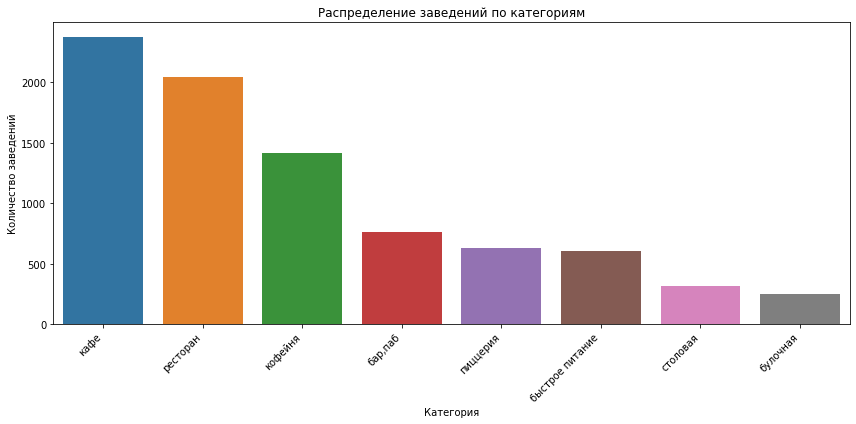

In [28]:
plt.figure(figsize=(12, 6))
sns.barplot(data=category_counts, x='Категория', y='Количество')
plt.title('Распределение заведений по категориям')
plt.xlabel('Категория')
plt.ylabel('Количество заведений')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Выводы по распределению заведений общественного питания по категориям.

Лидеры рынка:
1. Кафе (2377) и рестораны (2041) составляют основную долю заведений (вместе ~52% от общего числа). Причина — ниверсальность форматов (кафе подходят для casual-встреч, рестораны — для полноценных обедов/ужинов).
2. Кофейни (1413) занимают третье место, что отражает популярность кофейной культуры.
3. Бары и пабы (765), пиццерии (633) и заведения быстрого питания (603) представлены примерно одинаково (~10% каждый).
    - Интересно — пиццерий меньше, чем баров, несмотря на популярность пиццы. Возможно, часть пиццерий включена в категорию «рестораны».
4. Столовые (315) и булочные (255) — наименее распространены.
    - Почему:
        - Столовые ассоциируются с бюджетным питанием (корпоративные, учебные заведения).
        - Булочные — узкоспециализированный формат, часто совмещаются с кафе.

Ключевые наблюдения:

- Доминирование универсальных форматов (кафе, рестораны) говорит о спросе на места для разнообразного отдыха.
- Высокая конкуренция в кофейном сегменте — рынок может быть перенасыщен.
- Недостаток бюджетных вариантов (столовые) — возможна ниша для развития.
- Разрыв между "премиум" и "эконом": рестораны и кофейни vs. столовые и булочные.

---
<a id="section8"></a>
### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.

In [29]:
districts = df['district'].unique()
print('Уникальные административные районы:')
print(districts)
print(f"Всего: {len(districts)} районов.")

Уникальные административные районы:
['северный административный округ'
 'северо-восточный административный округ'
 'северо-западный административный округ'
 'западный административный округ' 'центральный административный округ'
 'восточный административный округ' 'юго-восточный административный округ'
 'южный административный округ' 'юго-западный административный округ']
Всего: 9 районов.


In [30]:
district_counts = df['district'].value_counts().reset_index()
district_counts.columns = ['Район', 'Количество']
district_counts['Доля, %'] = (district_counts['Количество'] / len(df) * 100).round(2)

print('Количество заведений по районам с долей:')
print(district_counts)

Количество заведений по районам с долей:
                                     Район  Количество  Доля, %
0       центральный административный округ        2242    26.68
1          северный административный округ         898    10.69
2             южный административный округ         892    10.62
3  северо-восточный административный округ         890    10.59
4          западный административный округ         850    10.12
5         восточный административный округ         798     9.50
6     юго-восточный административный округ         714     8.50
7      юго-западный административный округ         709     8.44
8   северо-западный административный округ         409     4.87


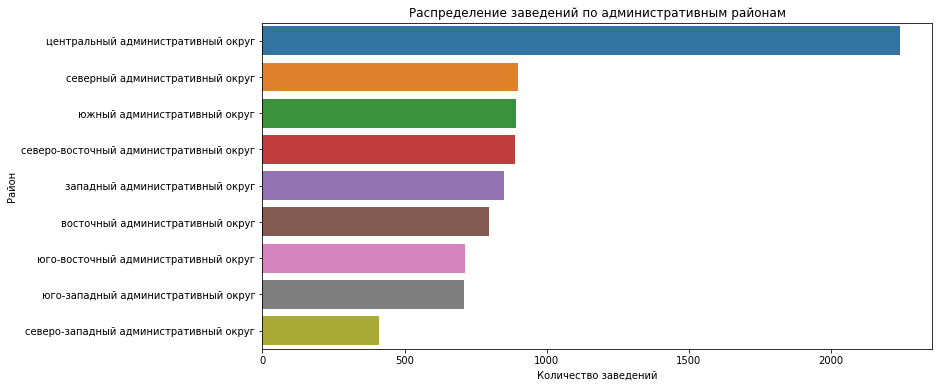

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=district_counts, y='Район', x='Количество')
plt.title('Распределение заведений по административным районам')
plt.ylabel('Район')
plt.xlabel('Количество заведений')
plt.show()

Выводы по распределению заведений общественного питания в Москве:
1. Лидер по количеству заведений — Центральный административный округ (ЦАО) — 26.7% всех заведений Москвы сосредоточено в ЦАО (2242 из 8402).
- Это объясняется:
    - Туристической привлекательностью (Кремль, Красная площадь, Арбат).
    - Деловой активностью (офисы, бизнес-центры).
    - Высокой плотностью населения и транспортной доступностью.
2. Второй и третий по количеству — Северный и Южный округа — близость к центру, развитая инфраструктура, высокая численность населения.
- Северный (САО) — 10.7% (898 заведений).
- Южный (ЮАО) — 10.6% (892 заведения).
3. Наименьшее количество заведений — Северо-Западный округ (СЗАО) — Всего 4.9% (409 заведений).
- Возможные причины: менее плотная застройка, удаленность от центра и меньшая деловая активность.
4. Равномерное распределение в остальных округах говорит о сбалансированном развитии общепита в этих районах, где количество заведений коррелирует с численностью населения и плотностью застройки.
- Северо-Восточный (СВАО) — 10.6%
- Западный (ЗАО) — 10.1%
- Восточный (ВАО) — 9.5%
- Юго-Восточный (ЮВАО) — 8.5%
- Юго-Западный (ЮЗАО) — 8.4%

In [32]:
central_district = df[df['district'] == 'центральный административный округ']
category_counts = central_district['category'].value_counts().reset_index()
category_counts.columns = ['Категория', 'Количество']
total = category_counts['Количество'].sum()
category_counts['Доля,%'] = ((category_counts['Количество'] / total) * 100).round(2)

print('Количество заведений по категориям с долей в ЦАО:')
print(category_counts)

Количество заведений по категориям с долей в ЦАО:
         Категория  Количество  Доля,%
0         ресторан         670   29.88
1             кафе         464   20.70
2          кофейня         428   19.09
3          бар,паб         364   16.24
4         пиццерия         113    5.04
5  быстрое питание          87    3.88
6         столовая          66    2.94
7         булочная          50    2.23


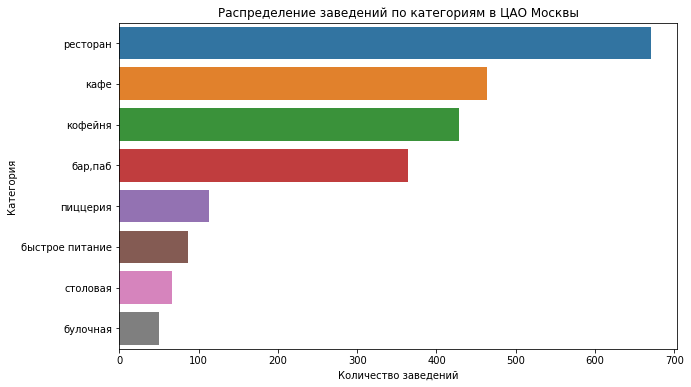

In [33]:
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=category_counts, x='Количество', y='Категория')

plt.title('Распределение заведений по категориям в ЦАО Москвы')
plt.xlabel('Количество заведений')
plt.ylabel('Категория')

plt.show()

Выводы по распределению заведений общественного питания в ЦАО Москвы:

1. Доминирование ресторанного сегмента
- Рестораны занимают лидирующую позицию (29.88%), что почти в 1.5 раза больше, чем кафе (20.7%).
- Это отражает премиальный характер ЦАО - здесь сосредоточены рестораны для деловых встреч, туристов и состоятельных гостей.

2. Высокая доля кофейной культуры
- Кофейни (19.09%) практически сравнялись по количеству с кафе.
- Подтверждает тренд на "кофейную урбанизацию" и популярность форматов работы с ноутбуками.

3. Значительное присутствие баров
- Бары/пабы (16.24%) образуют отдельный крупный сегмент.
- Отражает развитую ночную жизнь и развлекательную инфраструктуру центра столицы.

4. Небольшая доля демократичных форматов
- Пиццерии (5.04%), столовые (2.94%) и булочные (2.23%) занимают скромные позиции.
- Показывает, что ЦАО ориентирован на средний+ и премиальный сегмент.

5. Неравномерное распределение
- Топ-4 категории (рестораны, кафе, кофейни, бары) охватывают 85.91% рынка.
- Остальные форматы представлены минимально.

Данное распределение отражает статус ЦАО как гастрономического центра Москвы с акцентом на качественный досуг и бизнес-питание, а не на демократичные форматы общепита.

---
<a id="section9"></a>
### Задача 3

Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуйте данные, ответьте на вопросы и постройте необходимые визуализации.

In [34]:
# Общее соотношение сетевых и несетевых
chain_counts = df['chain'].value_counts()
chain_percentage = chain_counts / len(df) * 100

print("Общее соотношение:")
print(f"Несетевые заведения: {chain_counts[0]} ({chain_percentage[0]:.1f}%)")
print(f"Сетевые заведения: {chain_counts[1]} ({chain_percentage[1]:.1f}%)")

Общее соотношение:
Несетевые заведения: 5198 (61.9%)
Сетевые заведения: 3204 (38.1%)


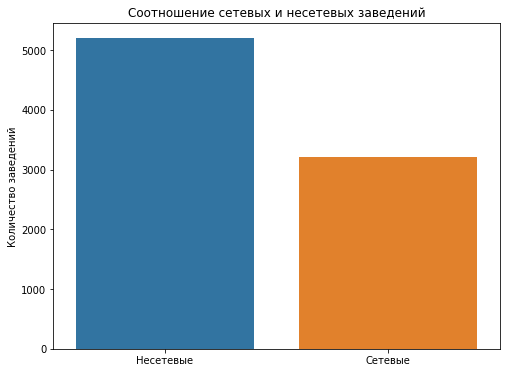

In [35]:
# Визуализация
plt.figure(figsize=(8, 6))
sns.barplot(x=['Несетевые', 'Сетевые'], y=chain_counts.values)
plt.title('Соотношение сетевых и несетевых заведений')
plt.ylabel('Количество заведений')
plt.show()

Общее соотношение сетевых и несетевых заведений.

Из данных видно, что:
- Несетевых заведений: 5198 (61.9%)
- Сетевых заведений: 3204 (38.1%)

Таким образом, несетевых заведений существенно больше, чем сетевых.

In [36]:
# Анализ по категориям
category_chain = df.groupby(['category', 'chain']).size().unstack().fillna(0)
category_chain['total'] = category_chain[0] + category_chain[1]
category_chain['chain_percentage'] = (category_chain[1] / category_chain['total'] * 100).round(1)
category_chain = category_chain.sort_values('chain_percentage', ascending=False)

print("Доля сетевых заведений по категориям:")
print(category_chain[['chain_percentage', 'total']])

Доля сетевых заведений по категориям:
chain            chain_percentage  total
category                                
булочная                     61.2    255
пиццерия                     52.1    633
кофейня                      51.0   1413
быстрое питание              38.5    603
ресторан                     35.8   2041
кафе                         32.8   2377
столовая                     27.9    315
бар,паб                      22.1    765


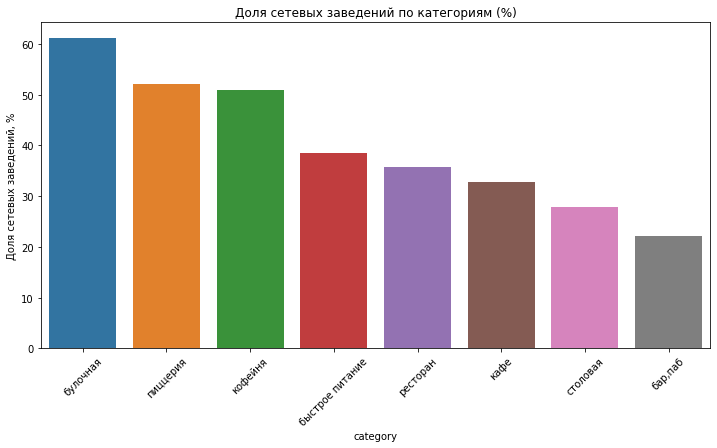

In [37]:
# Визуализация
plt.figure(figsize=(12, 6))
sns.barplot(x=category_chain.index, y=category_chain['chain_percentage'])
plt.title('Доля сетевых заведений по категориям (%)')
plt.xticks(rotation=45)
plt.ylabel('Доля сетевых заведений, %')
plt.show()

Результаты по категориям:
- Булочные - самая высокая доля сетевых заведений (вероятно, из-за популярности сетевых пекарен)
- Кафе и кофейни - средний уровень сетевых заведений
- Рестораны и бары/пабы - наименьшая доля сетевых заведений, так как эти заведения чаще уникальны

Выводы по сетевым и несетевым заведениям:
1. В целом по данным несетевых заведений больше (61.9% против 38.1% сетевых).

2. Наиболее "сетевыми" категориями являются:
    - Булочные (высокая доля сетевых)
    - Быстрое питание
    - Кофейни

3. Наименее сетевыми категориями являются:
    - Рестораны
    - Бары/пабы
    - Столовые

Это соответствует рыночной логике - форматы быстрого питания и кофеен легче стандартизировать и масштабировать, тогда как рестораны и бары чаще создаются как уникальные проекты.

---
<a id="section10"></a>
### Задача 4

Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводите подходящими визуализациями.


In [38]:
print(df['seats'].describe())

count    4792.000000
mean      108.361436
std       122.841130
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64


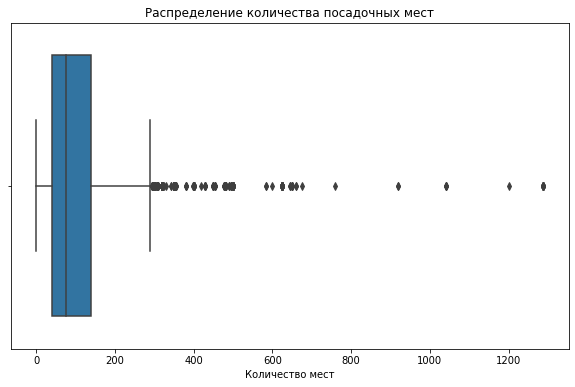

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['seats'])
plt.title('Распределение количества посадочных мест')
plt.xlabel('Количество мест')
plt.show()

In [40]:
print(df[df['seats'] > 300].sort_values('seats', ascending=False)[['name', 'category', 'seats']])

                  name         category   seats
6637  one price coffee          кофейня  1288.0
6514       delonixcafe         ресторан  1288.0
6804      яндекс лавка         ресторан  1288.0
6686    японская кухня         ресторан  1288.0
6767             точка             кафе  1288.0
...                ...              ...     ...
5112         козловица          бар,паб   306.0
5172             prime         ресторан   306.0
5196       правда кофе          кофейня   306.0
4964              мару  быстрое питание   306.0
8311    чайхана бишкек         ресторан   305.0

[251 rows x 3 columns]


Общая статистика и аномалии по посадочным местам:

1. Среднее количество мест составляет 108, но высокое стандартное отклонение (122.8) указывает на сильный разброс данных.
2. Встречаются крайние значения (0 и 1288 мест), требующие дополнительной проверки.
3. Большой разброс между 25% (40 мест) и 75% (140 мест) квантилями указывает на разнородность форматов внутри категорий.
4. 251 заведение (5.2% от выборки) имеет более 300 мест, что выглядит аномально для большинства категорий.
5. Особенно подозрительны повторяющиеся значения 1288 мест в разных категориях (кофейня, ресторан, кафе), что может указывать на:
    - Ошибки ввода данных.
    -  Особые форматы заведений (крупные фудкорты, конгресс-центры).

In [41]:
category_seats = df.groupby('category')['seats'].median().sort_values(ascending=False)
print(category_seats)

category
ресторан           86.0
бар,паб            82.5
кофейня            80.0
столовая           75.5
быстрое питание    65.0
кафе               60.0
пиццерия           55.0
булочная           50.0
Name: seats, dtype: float64


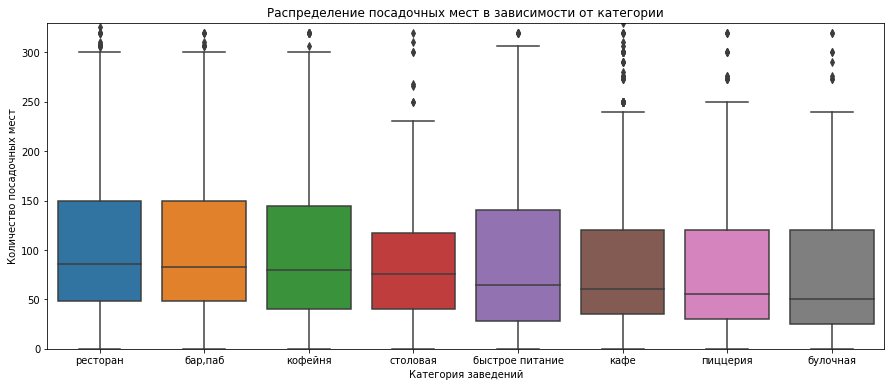

In [42]:
order=df.groupby('category')['seats'].median().sort_values(ascending=False).index 

plt.figure(figsize=(15, 6))
sns.boxplot(x='category', 
            y='seats', 
            data=df, 
            order=order).set(title = 'Распределение посадочных мест в зависимости от категории', 
                             xlabel = 'Категория заведений', 
                             ylabel = 'Количество посадочных мест',
                             ylim=(0, 330))  
plt.show()

Выводы по распределению посадочных мест в зависимости от категории:
1. Неожиданно высокие медианные значения (особенно для кофеен - 80 мест), что противоречит рыночной практике.
2. Кофейни и бары демонстрируют необычно высокую вместимость по сравнению с кафе.
3. Булочные имеют сравнительно небольшую вместимость (50 мест), что соответствует ожиданиям.

Общий вывод по посадочным местам:

Данные содержат значительные аномалии в количестве посадочных мест, особенно в верхнем диапазоне. Типичные значения по категориям выглядят завышенными по сравнению с рыночными реалиями, что требует дополнительной проверки качества данных. Наиболее достоверные результаты можно получить, анализируя усеченную выборку (например, заведения до 200 мест).

---
<a id="section11"></a>
### Задача 5

Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

In [43]:
# Общая статистика рейтингов
print(df['rating'].describe())

count    8402.000000
mean        4.230017
std         0.470320
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64


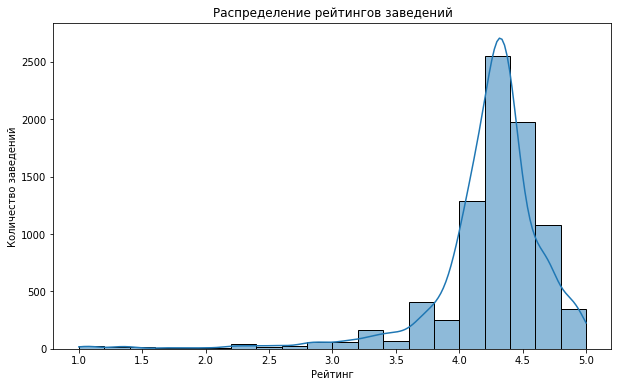

In [44]:
# Гистограмма общего распределения:
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=20, kde=True)
plt.title('Распределение рейтингов заведений')
plt.xlabel('Рейтинг')
plt.ylabel('Количество заведений')
plt.show()

1. Общая характеристика рейтингов:
- Средний рейтинг по всем заведениям составляет 4.23 (по шкале от 1 до 5), что указывает на в целом положительные оценки.
- Медиана (50%-й перцентиль) равна 4.3, что близко к среднему значению, что говорит об отсутствии сильного перекоса в распределении.

2. Распределение оценок (по гистограмме):
Распределение рейтингов смещено вправо (в сторону высоких оценок):

- Пик находится в районе 4.0-4.5
- Очень мало заведений с рейтингом ниже 3.0
- Максимальный рейтинг 5.0 встречается заметно чаще, чем минимальный 1.0
- Это типичная картина для пользовательских оценок, где:
    - Люди чаще ставят высокие оценки, если остались довольны.
    - Низкие оценки ставятся реже (возможно, только при очень плохом опыте).

3. Выбросы и аномалии:
- Наличие оценок 1.0 (минимум) при том, что 25%-й перцентиль равен 4.1:
- Это означает, что менее 25% заведений имеют рейтинг ниже 4.1
- Заведения с рейтингом 1.0-3.0 составляют очень малую долю.

4. Практические выводы
 - Большинство заведений получают оценки выше 4.0
 - Это может указывать на:
   - В целом хорошее качество заведений.
    - Лояльность пользователей (склонность завышать оценки).

Вывод: 

Пользователи склонны ставить высокие оценки, а низкие встречаются редко (возможно, только при очень плохом опыте).

In [45]:
# Средние рейтинги по категориям
rating_by_category = df.groupby('category')['rating'].mean().sort_values(ascending=False).round(2)
print(rating_by_category)

category
бар,паб            4.39
пиццерия           4.30
ресторан           4.29
кофейня            4.28
булочная           4.27
столовая           4.21
кафе               4.12
быстрое питание    4.05
Name: rating, dtype: float64


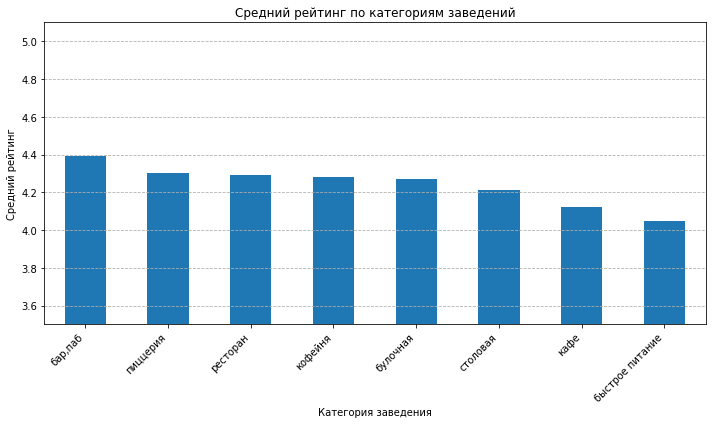

In [46]:
plt.figure(figsize=(10, 6))
rating_by_category.plot(kind='bar')
plt.title('Средний рейтинг по категориям заведений')
plt.xlabel('Категория заведения')
plt.ylabel('Средний рейтинг')
plt.ylim(3.5, 5.1)
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Из анализа средних рейтингов по категориям заведений общественного питания можно сделать следующие выводы:

- Наивысшие средние рейтинги у:
    - Баров/пабов (4.39)
    - Пиццерий (4.30)
    - Ресторанов (4.29)
- Самые низкие рейтинги у:
    - Заведений быстрого питания (4.05)
    - Кафе (4.12)
    - Столовых (4.21)

Возможные причины различий:

- Высокие рейтинги баров/пабов и пиццерий могут объясняться:
    - Более неформальной атмосферой.
    - Четкой специализацией (меньше ожиданий).
    - Алкогольным фактором (повышенным настроением гостей).
- Низкие рейтинги фастфуда и кафе могут быть связаны:
    - Высокими ожиданиями при массовом спросе.
    - Более строгой оценкой сервиса.
    - Конкуренцией (больше сравнений).

---
<a id="section12"></a>
### Задача 6

Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.

In [47]:
# Подготовка данных для корреляционного анализа
corr_data = df[['rating', 'category', 'district', 'chain', 'seats', 'price', 'is_24_7']]
corr_matrix = corr_data.phik_matrix()
print(corr_matrix)

interval columns not set, guessing: ['rating', 'chain', 'seats']
            rating  category  district     chain     seats     price   is_24_7
rating    1.000000  0.189817  0.200761  0.107819  0.000000  0.220295  0.150365
category  0.189817  1.000000  0.174360  0.265165  0.047262  0.566933  0.244793
district  0.200761  0.174360  1.000000  0.063976  0.352440  0.202787  0.076357
chain     0.107819  0.265165  0.063976  1.000000  0.056354  0.218211  0.043357
seats     0.000000  0.047262  0.352440  0.056354  1.000000  0.088146  0.043193
price     0.220295  0.566933  0.202787  0.218211  0.088146  1.000000  0.084183
is_24_7   0.150365  0.244793  0.076357  0.043357  0.043193  0.084183  1.000000


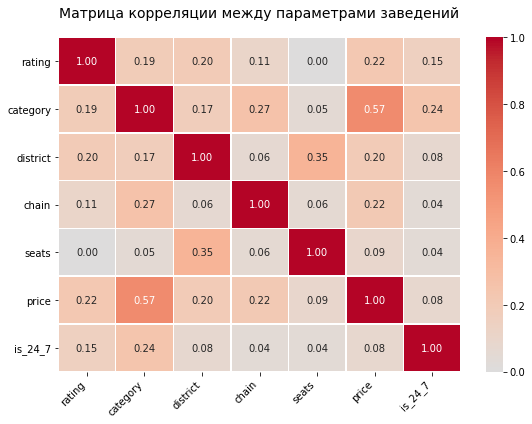

In [48]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            center=0, 
            linewidths=0.5,
            linecolor='white')
plt.title('Матрица корреляции между параметрами заведений', fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

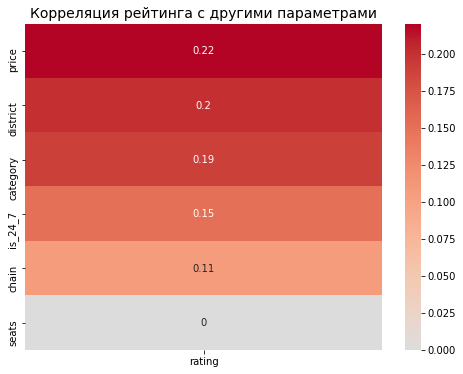

Самая сильная корреляция: rating ~ price (0.2203)


In [49]:
# Визуализация корреляции только для рейтинга
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix[['rating']].sort_values('rating', ascending=False)[1:], 
            annot=True, cmap='coolwarm', center=0)
plt.title('Корреляция рейтинга с другими параметрами', fontsize=14)
plt.show()

strongest_corr = corr_matrix['rating'].drop('rating').abs().sort_values(ascending=False).index[0]
strongest_corr_value = corr_matrix['rating'].loc[strongest_corr]
print(f"Самая сильная корреляция: rating ~ {strongest_corr} ({strongest_corr_value:.4f})")

In [50]:
df.groupby('price')['rating'].mean().sort_values(ascending=False)

price
высокие          4.436611
выше среднего    4.386348
средние          4.297874
низкие           4.173077
Name: rating, dtype: float64

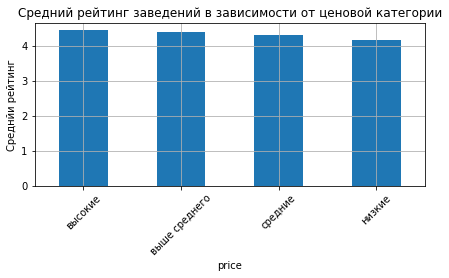

In [51]:
plt.figure(figsize=(7, 3))
df.groupby('price')['rating'].mean().sort_values(ascending=False).plot(
               kind='bar',
               rot=45,
               legend=False,
               title=f'Средний рейтинг заведений в зависимости от ценовой категории')
plt.ylabel('Среднйи рейтинг')
plt.grid()
plt.show()

Выводы по корреляционному анализу рейтинга заведений

1. Наибольшая корреляция с рейтингом

Наибольшая положительная корреляция наблюдается между рейтингом заведения и его ценовой категорией (PhiK = 0.2203). Это означает, что заведения с более высокими ценами в среднем получают более высокие оценки.

2. Зависимость среднего рейтинга от ценовой категории
- Высокие цены → наибольший средний рейтинг (4.44)
- Выше среднего → 4.39
- Средние → 4.30
- Низкие → 4.17
  - Это подтверждает, что клиенты склонны выше оценивать заведения с более дорогим обслуживанием, возможно, из-за ожидаемого качества сервиса, интерьера или престижности.


3. Другие значимые корреляции
- Категория заведения (0.19) и круглосуточный режим работы (0.15) также имеют слабую, но заметную связь с рейтингом.
- Район расположения (0.20) показывает, что в некоторых административных округах Москвы заведения в среднем получают более высокие оценки.


4. Слабые или отсутствующие связи
- Количество мест (seats) почти не коррелирует с рейтингом (0.00), что говорит о том, что размер заведения не влияет на оценку клиентов.
- Сетевой статус (chain) имеет слабую связь (0.11), что может означать, что принадлежность к сети не гарантирует высоких оценок.

---
<a id="section13"></a>
### Задача 7

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.

In [52]:
chain_df = df[df['chain'] == 1]
top_chains = chain_df.groupby('name').agg(
    count=('name', 'size'),
    avg_rating=('rating', 'mean'),
    category=('category', lambda x: x.mode()[0])  # берем самую частую категорию
).sort_values('count', ascending=False).head(15)
top_chains

,count,avg_rating,category
name,,,
шоколадница,120,4.177500,кофейня
домино'с пицца,76,4.169737,пиццерия
додо пицца,74,4.286486,пиццерия
one price coffee,71,4.064789,кофейня
яндекс лавка,69,3.872464,ресторан
cofix,65,4.075385,кофейня
prime,50,4.116000,ресторан
хинкальная,44,4.322727,кафе
кофепорт,42,4.147619,кофейня


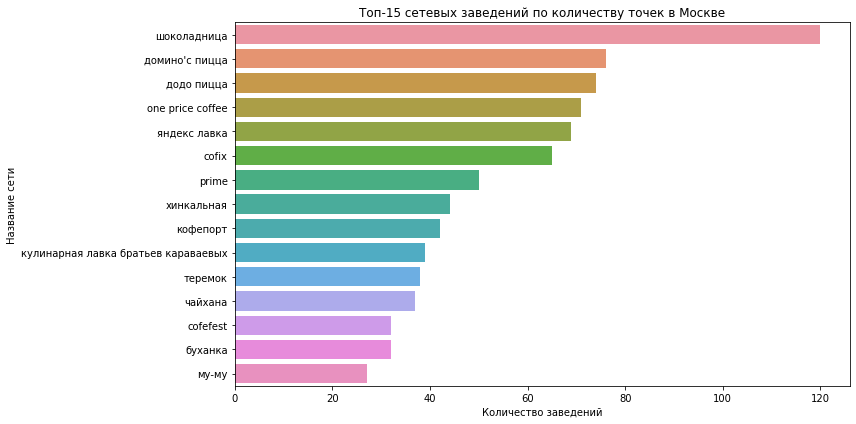

In [53]:
# Визуализация 1: количество заведений по сетям
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y=top_chains.index, data=top_chains)
plt.title('Топ-15 сетевых заведений по количеству точек в Москве')
plt.xlabel('Количество заведений')
plt.ylabel('Название сети')
plt.tight_layout()
plt.show()

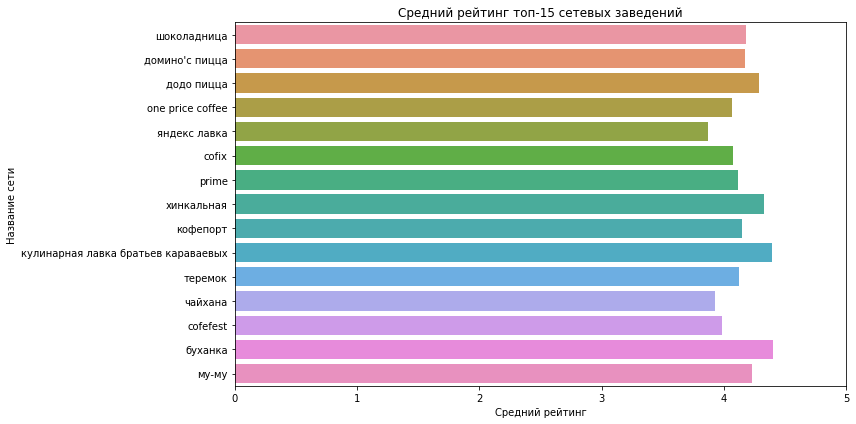

In [54]:
# Визуализация 2: средний рейтинг сетей
plt.figure(figsize=(12, 6))
sns.barplot(x='avg_rating', y=top_chains.index, data=top_chains)
plt.title('Средний рейтинг топ-15 сетевых заведений')
plt.xlabel('Средний рейтинг')
plt.ylabel('Название сети')
plt.xlim(0, 5)  # Устанавливаем диапазон оси X от 0 до 5
plt.tight_layout()
plt.show()

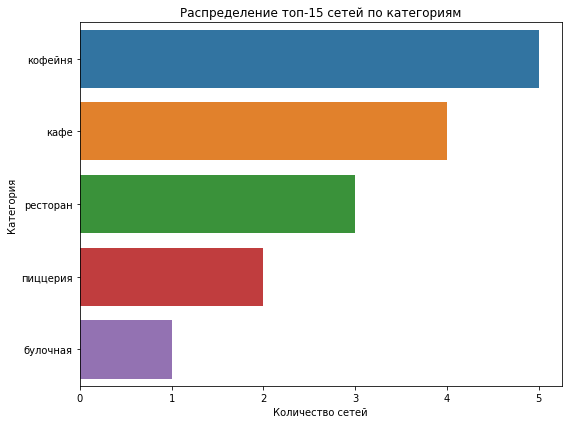

                                     count  avg_rating  category
name                                                            
шоколадница                            120    4.177500   кофейня
домино'с пицца                          76    4.169737  пиццерия
додо пицца                              74    4.286486  пиццерия
one price coffee                        71    4.064789   кофейня
яндекс лавка                            69    3.872464  ресторан
cofix                                   65    4.075385   кофейня
prime                                   50    4.116000  ресторан
хинкальная                              44    4.322727      кафе
кофепорт                                42    4.147619   кофейня
кулинарная лавка братьев караваевых     39    4.394872      кафе
теремок                                 38    4.123684  ресторан
чайхана                                 37    3.924324      кафе
cofefest                                32    3.984375   кофейня
буханка                  

In [55]:
# Визуализация 3: распределение по категориям
category_counts = top_chains['category'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=category_counts.values, y=category_counts.index)
plt.title('Распределение топ-15 сетей по категориям')
plt.xlabel('Количество сетей')
plt.ylabel('Категория')
plt.tight_layout()
plt.show()
print(top_chains)

Выводы по анализу топ-15 сетевых заведений Москвы:

1. Популярность сетей (количество заведений):

- Лидером является сеть "Шоколадница" (120 точек), что значительно больше, чем у остальных. Это говорит о высокой узнаваемости и востребованности бренда.
- Пиццерии ("Домино'с пицца", "Додо пицца") и кофейни ("One Price Coffee", "Cofix") также представлены большим числом заведений, что отражает популярность этих форматов в Москве.
- Сети с меньшим количеством точек (например, "Му-Му" — 27) могут быть менее распространены или ориентированы на узкую аудиторию.

2. Средний рейтинг:

- Наивысший рейтинг у "Буханки" (4.40) и "Кулинарной лавки братьев Караваевых" (4.39), что указывает на высокое качество продукции или сервиса.
- Самый низкий рейтинг у "Яндекс Лавки" (3.87), что может быть связано с форматом (ресторан с ограниченным ассортиментом или самообслуживанием).
- Большинство сетей имеют рейтинг выше 4.0, что говорит о хорошем уровне удовлетворенности клиентов.

3. Распределение по категориям:

- Кофейни (6 сетей) — самый распространенный формат. Это связано с высокой востребованностью кофеен в городской среде (удобство, скорость обслуживания).
- Кафе (4 сети) и рестораны (3 сети) — также популярные категории, но с меньшим охватом.
- Пиццерии (2 сети) и булочная (1 сеть) — менее представлены, но имеют высокие рейтинги, особенно пиццерии.

---
<a id="section14"></a>
### Задача 8

Изучите вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируйте цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.


In [56]:
avg_bill_by_district = df.groupby('district')['middle_avg_bill'].mean().sort_values(ascending=False).reset_index()
avg_bill_by_district.columns = ['Район', 'Средний чек']
print(avg_bill_by_district)

                                     Район  Средний чек
0       центральный административный округ  1191.057547
1          западный административный округ  1053.225490
2          северный административный округ   927.959627
3             южный административный округ   834.398089
4   северо-западный административный округ   822.222930
5         восточный административный округ   820.626923
6      юго-западный административный округ   792.561702
7  северо-восточный административный округ   716.611296
8     юго-восточный административный округ   654.097938


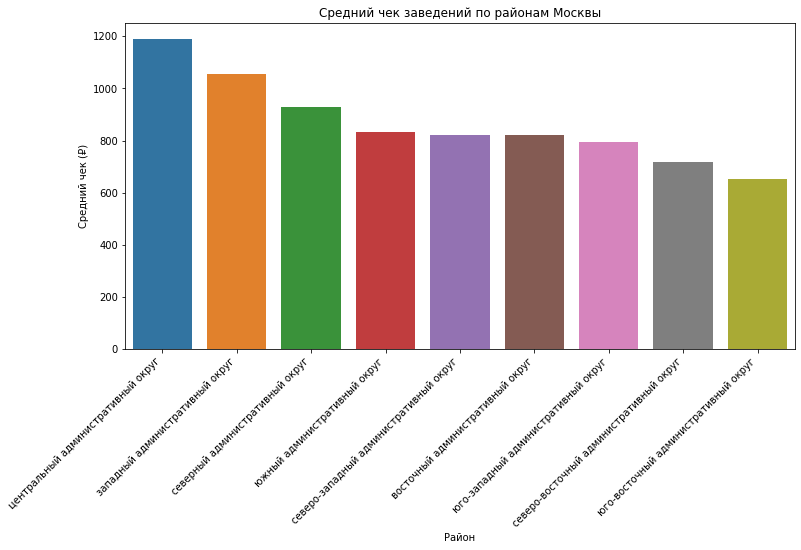

In [57]:
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_bill_by_district, x='Район', y='Средний чек')
plt.xticks(rotation=45, ha='right')
plt.title('Средний чек заведений по районам Москвы')
plt.ylabel('Средний чек (₽)')
plt.show()

In [58]:
central_avg = avg_bill_by_district.loc[avg_bill_by_district['Район'] == 'центральный административный округ', 'Средний чек'].values[0]
avg_bill_by_district['Разница с ЦАО (₽)'] = central_avg - avg_bill_by_district['Средний чек']
print(avg_bill_by_district.sort_values('Разница с ЦАО (₽)', ascending=False))

                                     Район  Средний чек  Разница с ЦАО (₽)
8     юго-восточный административный округ   654.097938         536.959609
7  северо-восточный административный округ   716.611296         474.446251
6      юго-западный административный округ   792.561702         398.495845
5         восточный административный округ   820.626923         370.430624
4   северо-западный административный округ   822.222930         368.834617
3             южный административный округ   834.398089         356.659458
2          северный административный округ   927.959627         263.097920
1          западный административный округ  1053.225490         137.832057
0       центральный административный округ  1191.057547           0.000000


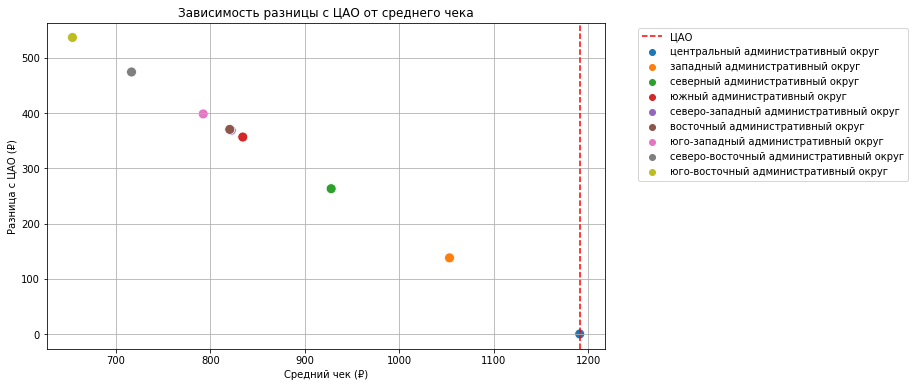

In [59]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=avg_bill_by_district,
    x='Средний чек',
    y='Разница с ЦАО (₽)',
    hue='Район',
    s=100,
    palette='tab10'
)
plt.axvline(central_avg, color='red', linestyle='--', label='ЦАО')
plt.title('Зависимость разницы с ЦАО от среднего чека')
plt.xlabel('Средний чек (₽)')
plt.ylabel('Разница с ЦАО (₽)')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.show()

Выводы:

1. Центральный округ (ЦАО) — самый дорогой
- Средний чек: 1191 ₽ (на 12% выше, чем в ЗАО — втором по дороговизне).
- Причина: высокая концентрация премиальных заведений, туристическая привлекательность.
2. Чем дальше от центра, тем дешевле
- Наибольшая разница с ЦАО:
    - ЮВАО: −536 ₽ (средний чек 654 ₽ — на 45% дешевле ЦАО).
    - СВАО: −474 ₽ (717 ₽ — на 40% дешевле).

На scatterplot видна отрицательная зависимость: чем выше средний чек (ближе к ЦАО), тем меньше разница с ЦАО (точки смещаются вниз).


Итог:

Цены в московских заведениях четко коррелируют с удалённостью от центра:
- ЦАО — дорогой, статусный.
- Южные/восточные — бюджетные.
- Северные/западные — средний ценовой сегмент.

---
<a id="section15"></a>
### Промежуточный вывод

Обобщите полученные результаты, выделив, по вашему мнению, самые важные.

1. Распределение по категориям
- Лидеры рынка: Кафе (2377) и рестораны (2041) составляют 52% всех заведений, что говорит о спросе на универсальные форматы.
- Популярность кофеен (1413 заведений) подтверждает тренд на кофейную культуру.
- Меньше бюджетных форматов: Столовые (315) и булочные (255) представлены слабо, что указывает на возможную нишу для развития.

2. Географическое распределение
- Центральный округ (ЦАО) — лидер по количеству заведений (26.7%), что связано с туристической привлекательностью и деловой активностью.
- Наименьшее число заведений в СЗАО (4.9%) из-за удаленности от центра и низкой плотности застройки.
- В ЦАО преобладают премиальные форматы: рестораны (29.9%) и бары (16.2%), тогда как демократичные (столовые, булочные) занимают менее 5%.

3. Сетевые vs. несетевые заведения
- Несетевых заведений больше (61.9%), особенно среди ресторанов и баров.
- Самые "сетевые" категории: булочные (легкость стандартизации) и кофейни (масштабируемость).

4. Рейтинги и ценовые категории
- Средний рейтинг по Москве — 4.23, причем бары/пабы лидируют (4.39), а фастфуд аутсайдер (4.05).
- Чем выше цена, тем выше рейтинг: заведения с высоким ценовым сегментом имеют средний рейтинг 4.44, тогда как бюджетные — 4.17.
- Корреляция с округом: В ЦАО не только больше заведений, но и выше средние чеки (1191 ₽ vs. 654 ₽ в ЮВАО).

5. Аномалии в данных
- Посадочные места: подозрительно высокие значения (например, 1288 мест) требуют проверки данных.
- Рейтинги: смещение в сторону высоких оценок (пик в 4.0–4.5) может указывать на лояльность пользователей или завышение оценок.

6. Топ сетевых заведений
- Лидер по количеству точек: "Шоколадница" (120 заведений).
- Лучшие рейтинги: "Буханка" (4.40) и "Караваевых" (4.39).
- Кофейни доминируют в топ-15 сетей, что подтверждает спрос на этот формат.

<a id="section16"></a>
## 4. Итоговый вывод и рекомендации

По результатам проведённого исследовательского анализа данных сформулируйте итоговый вывод и рекомендации для заказчика. Старайтесь акцентировать внимание на ключевых моментах исследования.

При составлении вывода придерживайтесь такой структуры:

1. Общий обзор проделанной работы.
2. Ответы на исследовательские вопросы, или главные выводы.
3. Рекомендации на основе анализа данных.

1. Общий обзор проделанной работы
Проведённый анализ охватил 8 402 заведения общественного питания Москвы, включая их распределение по категориям, округам, сетевым и несетевым форматам, рейтингам, ценовым сегментам и посадочным местам. Исследование позволило выявить ключевые закономерности рынка, конкурентную среду и перспективные ниши для развития.

2. Главные выводы (ответы на исследовательские вопросы).
- Структура рынка общепита в Москве:
    - Доминируют кафе и рестораны (52% рынка), что говорит о спросе на универсальные форматы.
    - Кофейни — третий по популярности сегмент, но возможна перенасыщенность.
    - Бюджетные форматы (столовые, булочные) слабо представлены, особенно в ЦАО.

- Географическое распределение:
    - ЦАО — центр премиального сегмента (26,7% заведений, средний чек 1 191 ₽).
    - СЗАО — наименее развитый округ (4,9% заведений), что может быть связано с низкой плотностью населения.
    - Чем дальше от центра, тем ниже цены (разница между ЦАО и ЮВАО — 45%).

- Влияние цены и формата на рейтинг:
    - Дорогие заведения получают более высокие оценки (4,44 для high-end vs. 4,17 для бюджетных).
    - Бары и пиццерии лидируют по рейтингу, фастфуд — аутсайдер.
    - Сетевые заведения не гарантируют высоких оценок, но легче масштабируются (например, кофейни).

- Аномалии и ограничения данных:
    - Завышенные значения посадочных мест (например, 1288) требуют проверки.
    - Рейтинги смещены в сторону высоких оценок (пик в 4,0–4,5), что может искажать реальное качество.

3. Рекомендации для заказчика.

- Выбор формата и позиционирования:
    - Для премиального сегмента: открывать рестораны или бары в ЦАО, делая ставку на высокий средний чек и рейтинг.
    - Для демократичного сегмента: рассмотреть столовые или пекарни в менее насыщенных округах (ЮВАО, СВАО).
    - Кофейни остаются перспективным, но конкурентным направлением — важно предложить уникальную концепцию.

- Локация:
    - ЦАО подходит для статусных проектов, но требует высоких инвестиций.
    - СЗАО и периферийные округа — возможность зайти на рынок с бюджетным форматом при меньшей конкуренции.

-  Управление репутацией:
    - Цена влияет на ожидания: в высоком сегменте критично поддерживать качество сервиса.
    - Для повышения рейтинга стоит делать акцент на атмосфере (как в барах) или специализации (как в пиццериях).